In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_csv('../logs/fig_1_20230327-170446.csv')
data

,Operation,Size (MB),Ratio,Latency,Throughput
0,WRITE,1024,1.0,6.41,131284.00
1,WRITE,1024,0.8,5.10,158173.00
2,WRITE,2048,1.0,5.29,159214.00
3,WRITE,2048,0.8,5.97,142696.00
4,WRITE,4096,1.0,6.20,140763.00
...,...,...,...,...,...
59,LONG SCAN,10240,0.8,406.25,2199.73
60,LONG SCAN,12288,1.0,507.66,1795.38
61,LONG SCAN,12288,0.8,444.23,2031.12
62,LONG SCAN,16384,1.0,544.87,1689.80


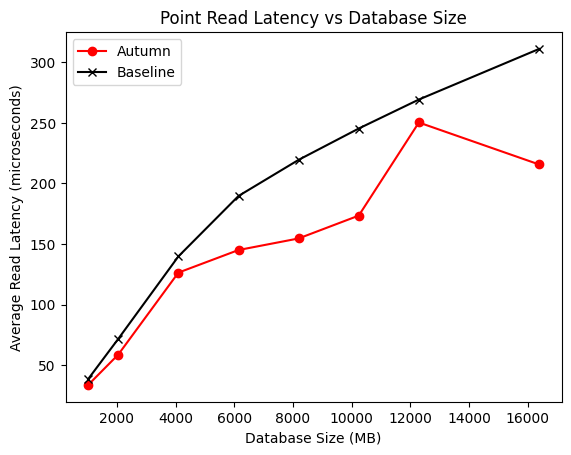

In [7]:
reads = data[data["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Point Read Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

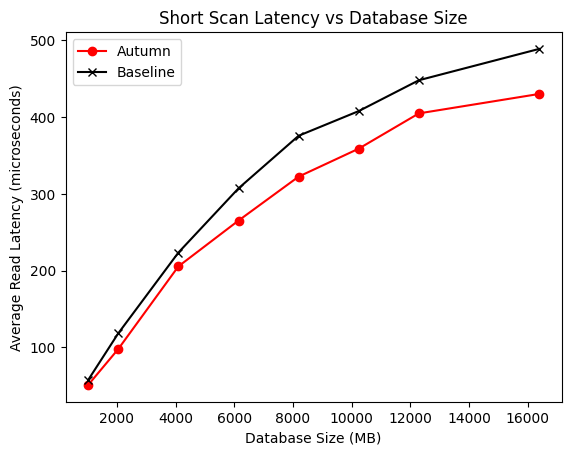

In [8]:
reads = data[data["Operation"] == "SHORT SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Short Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

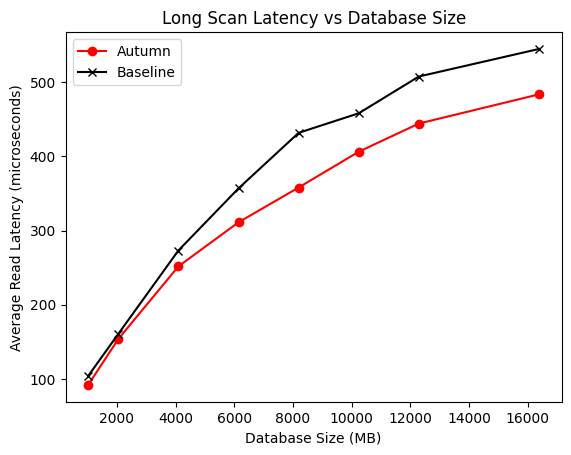

In [9]:
reads = data[data["Operation"] == "LONG SCAN"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Long Scan Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Read Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")

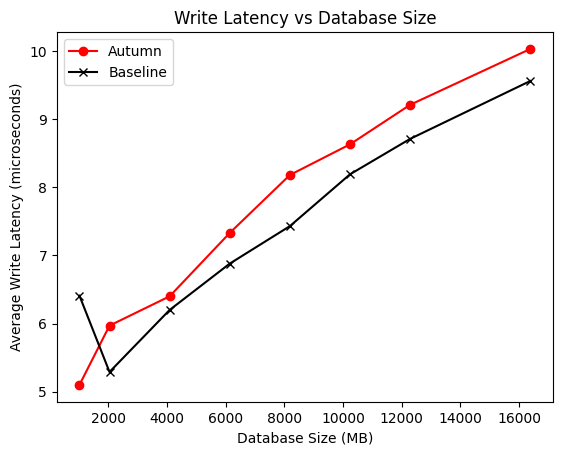

In [10]:
reads = data[data["Operation"] == "WRITE"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

plt.plot(reads_test.loc[:, "Size (MB)"], reads_test.loc[:, "Latency"], marker= 'o', color="red")
plt.plot(reads_base.loc[:, "Size (MB)"], reads_base.loc[:, "Latency"], marker='x', color="black")


plt.title("Write Latency vs Database Size")
plt.xlabel("Database Size (MB)")
plt.ylabel("Average Write Latency (microseconds)")
plt.legend(["Autumn", "Baseline"])
# plt.savefig("final_figs/read_vs_size.jpg", bbox_inches="tight")